In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
data = pd.read_csv('Training/training_variants')
print('number of data points : ', data.shape[0])
print('number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

number of data points :  3321
number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


The Data has 3321 Data points with 4 features

In [3]:
data_text = pd.read_csv('Training/training_text', sep='\|\|', engine= 'python', names=['ID', 'TEXT'], skiprows = 1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [4]:
import re
from nltk.corpus import stopwords

In [5]:
stop_words = set(stopwords.words("english"))

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:                  #Checks if its a int or not
        string = ""
        #replace every special character with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        #replace with multiple spaces with single space
        total_text = re.sub('\s+', ' ', total_text)
        #convert all char to lower case
        total_text = total_text.lower()
        
        for word in total_text.split():
            if not word in stop_words:
                string += word + ' '
                
        data_text[column][index] = string

In [6]:
import time

In [7]:
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row["TEXT"]) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no description for id :", index)
print(time.clock() - start_time, "seconds")

there is no description for id : 1109
there is no description for id : 1277
there is no description for id : 1407
there is no description for id : 1639
there is no description for id : 2755
64.9772517 seconds


In [8]:
result = pd.merge(data, data_text, on="ID", how="left")
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [9]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [10]:
result.loc[result['TEXT'].isnull(), 'TEXT'] = result['Variation'] + result['Gene']

In [11]:
result[result['ID']==1277]

,ID,Gene,Variation,Class,TEXT
1277,1277,ARID5B,Truncating Mutations,1,Truncating MutationsARID5B


# Dividing the dataset into testing and training sets and cross validation

In [12]:
y_true = result['Class'].values

#replacing spaces between the words in Gene column with '_'
result.Gene = result.Gene.str.replace('\s+', '_')

#replacing spaces between the words in Variation column with '_'
result.Variation = result.Variation.str.replace('\s+', '_')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#splitting into train test
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify = y_true, test_size=0.2)

#splitting train into train and cross validation
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [15]:
print(train_df.shape[0]) #data points in train set
print(test_df.shape[0])  #data points in test set
print(cv_df.shape[0])    #data points in cross validation set

2124
665
532


In [16]:
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

In [17]:
print(train_class_distribution)

1    363
2    289
3     57
4    439
5    155
6    176
7    609
8     12
9     24
Name: Class, dtype: int64


In [18]:
print(test_class_distribution)

1    114
2     91
3     18
4    137
5     48
6     55
7    191
8      4
9      7
Name: Class, dtype: int64


In [19]:
print(cv_class_distribution)

1     91
2     72
3     14
4    110
5     39
6     44
7    153
8      3
9      6
Name: Class, dtype: int64


In [20]:
from matplotlib import style
style.use('fivethirtyeight') or plt.style.use('fivethirtyeight')

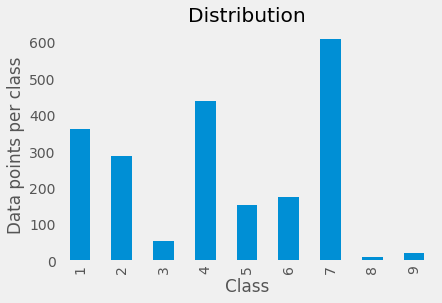

Number of data points in class 7 : 609 [ 28.67 %]
Number of data points in class 4 : 439 [ 20.67 %]
Number of data points in class 1 : 363 [ 17.09 %]
Number of data points in class 2 : 289 [ 13.61 %]
Number of data points in class 6 : 176 [ 8.29 %]
Number of data points in class 5 : 155 [ 7.3 %]
Number of data points in class 3 : 57 [ 2.68 %]
Number of data points in class 9 : 24 [ 1.13 %]
Number of data points in class 8 : 12 [ 0.56 %]


In [21]:
my_colors = 'rgbkmyc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per class')
plt.title('Distribution')
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':', train_class_distribution.values[i], '[', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 2), '%]' )

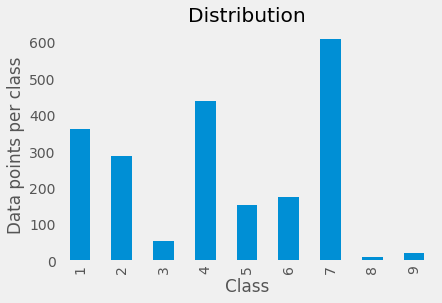

Number of data points in class 7 : 191 [ 28.72 %]
Number of data points in class 4 : 137 [ 20.6 %]
Number of data points in class 1 : 114 [ 17.14 %]
Number of data points in class 2 : 91 [ 13.68 %]
Number of data points in class 6 : 55 [ 8.27 %]
Number of data points in class 5 : 48 [ 7.22 %]
Number of data points in class 3 : 18 [ 2.71 %]
Number of data points in class 9 : 7 [ 1.05 %]
Number of data points in class 8 : 4 [ 0.6 %]


In [22]:
my_colors = 'rgbkmyc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per class')
plt.title('Distribution')
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':', test_class_distribution.values[i], '[', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 2), '%]' )

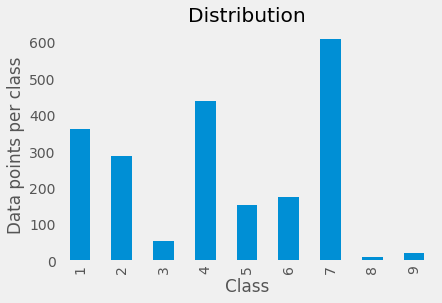

Number of data points in class 7 : 609 [ 28.76 %]
Number of data points in class 4 : 439 [ 20.68 %]
Number of data points in class 1 : 363 [ 17.11 %]
Number of data points in class 2 : 289 [ 13.53 %]
Number of data points in class 6 : 176 [ 8.27 %]
Number of data points in class 5 : 155 [ 7.33 %]
Number of data points in class 3 : 57 [ 2.63 %]
Number of data points in class 9 : 24 [ 1.13 %]
Number of data points in class 8 : 12 [ 0.56 %]


In [23]:
my_colors = 'rgbkmyc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per class')
plt.title('Distribution')
plt.grid()
plt.show()

sorted_yi = np.argsort(-cv_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':', train_class_distribution.values[i], '[', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 2), '%]' )

# Prediction using a random model

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    #divide each element of the confusion matrix with the sum of elements in that column
    A = (((C.T)/(C.sum(axis=1))).T)
    
    #divide each element of the confusion matrix with the sum of elements in that row
    B = ((C/C.sum(axis=0)))
    labels = [1,2,3,4,5,6,7,8,9]
    
    print("-"*30, "Confusion matrix", "-"*30)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    

In [25]:
print(test_df.shape[0])
print(cv_df.shape[0])

665
532


In [26]:
from sklearn.metrics.classification import accuracy_score, log_loss
import sys
sys.setrecursionlimit(2500)

Log loss on Cross Validation Data using Random Model 2.5812787947921705
Log loss on test Data using Random Model 2.5812787947921705
------------------------------ Confusion matrix ------------------------------


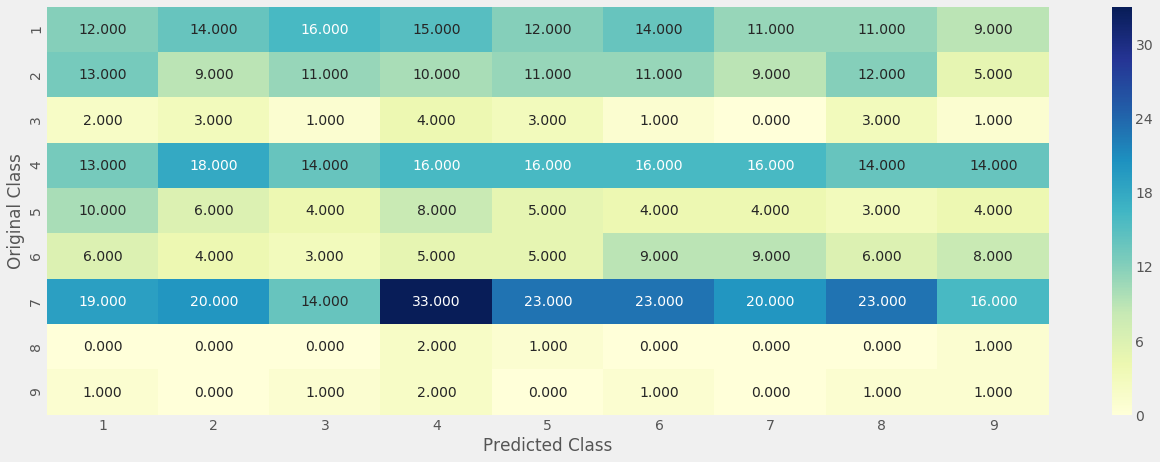

-------------------- Precision matrix (Columm Sum=1) --------------------


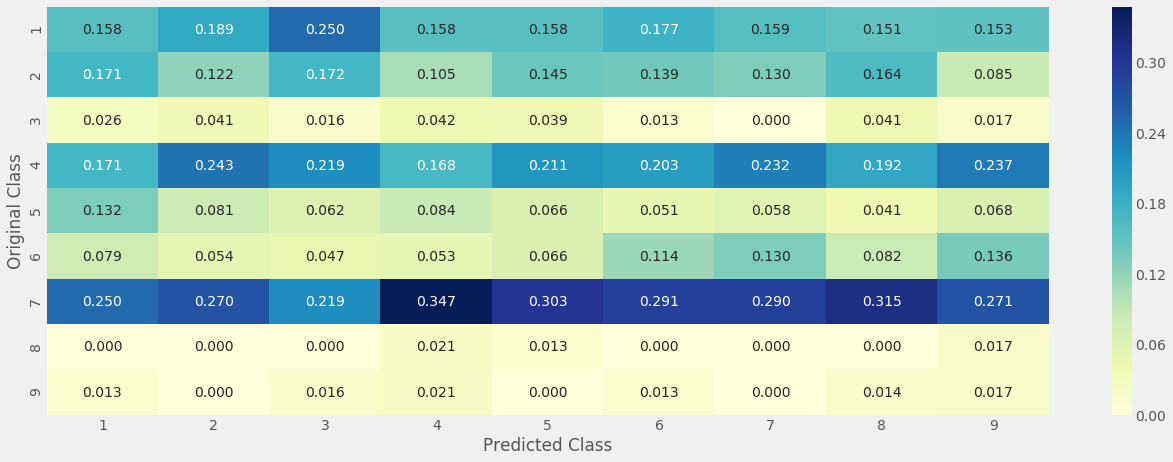

-------------------- Recall matrix (Row sum=1) --------------------


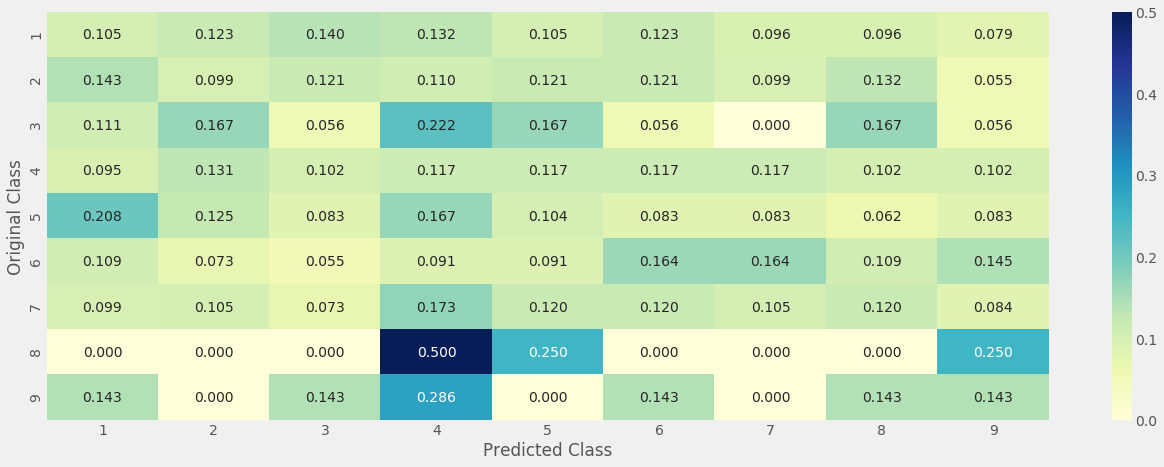

In [27]:
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs= np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))

#test set error
test_predicted_y = np.zeros((test_data_len, 9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on test Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))

predicted_y = np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

In [28]:
unique_genes = train_df['Gene'].value_counts()
print('Number of unique genes: ', unique_genes.shape[0])
print(unique_genes.head())

Number of unique genes:  237
BRCA1    176
TP53     102
EGFR      98
PTEN      80
BRCA2     77
Name: Gene, dtype: int64


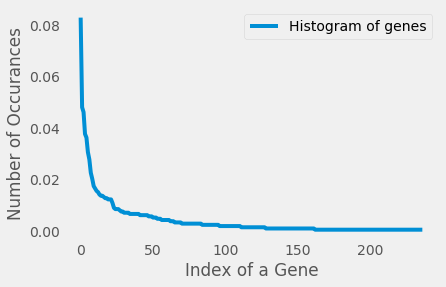

In [29]:
s = sum(unique_genes.values)
h = unique_genes.values/s
plt.plot(h, label='Histogram of genes')
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

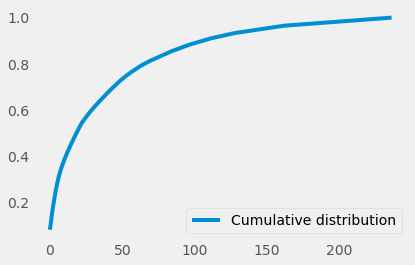

In [30]:
c = np.cumsum(h)
plt.plot(c, label='Cumulative distribution')
plt.grid()
plt.legend()
plt.show()

In [39]:
def get_gv_fea_dict(alpha, feature, df):
    value_count = train_df[feature].value_counts()  #Gives the count of eacg gene and variation in the dataframe
     
    gv_dict = dict()   #this dict will contain 9 probabilities of each gene variation of 9 classes
    
    for i, denominator in value_count.items():
        vec = []    #9 dimensional list containing 9 probabilities of each class for the ith gene
        for k in range(1,10):      #9 classes in total, count starts from 1-9
            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
                                            #cls_cnt Displays all the class and variation o fthat specigic gene
            vec.append((cls_cnt.shape[0] + alpha*10) / (denominator + 90*alpha))
            
        gv_dict[i] = vec
        
    return gv_dict


def get_gv_feature(alpha, feature, df):
    
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    value_count = train_df[feature].value_counts()
    
    gv_fea = []          # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
                         # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
        
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
    return gv_fea   

# Featurizing Gene Feature

In [40]:
#response coding for the Gene feature

alpha = 1    #Used for laplace smoothing
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))  #train gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))    #test gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))      #cv gene feature

In [41]:
#one-hot encoding of Gene Feature

from sklearn.feature_extraction.text import CountVectorizer
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.fit_transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.fit_transform(cv_df['Gene'])

In [42]:
train_gene_feature_responseCoding.shape

(2124, 9)

In [43]:
train_gene_feature_onehotCoding.shape

(2124, 237)